### Cumulative event plots comparing 2023 March Kawerau swarm with some others

Kawerau and Taupo as at 8 am 2023-03-27 (as they are still "ongoing")

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Kawerau

https://quakesearch.geonet.org.nz/csv?bbox=176.5798,-38.2193,176.8854,-37.9426&maxdepth=30&startdate=2023-03-17T11:00:00&enddate=2023-03-26T20:00:00


In [2]:
kawerau = pd.read_csv('kawerau.csv', parse_dates=['origintime'], usecols=[0,2,6,7])

kawerau.sort_values(by='origintime', inplace=True)

#event number
kawerau['evnum'] = np.arange(len(kawerau))

kawerau['days'] = (kawerau['origintime'] - kawerau['origintime'].iloc[0]).dt.total_seconds() / 86400

In [3]:
kawerau.days[-1:]

0    9.242549
Name: days, dtype: float64

<AxesSubplot:>

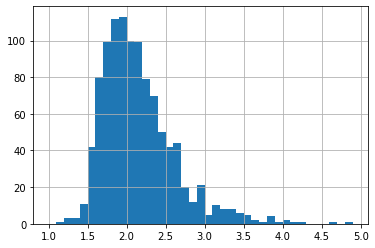

In [4]:
kawerau.magnitude.hist(bins=np.arange(1.0,5,0.1).tolist())

Rotoehu

https://quakesearch.geonet.org.nz/csv?bbox=176.3560,-38.1389,176.6615,-37.8618&maxdepth=30&startdate=2004-07-16T0:00:00&enddate=2004-08-10T0:00:00

In [5]:
rotoehu = pd.read_csv('rotoehu.csv', parse_dates=['origintime'], usecols=[0,2,6,7])

rotoehu.sort_values(by='origintime', inplace=True)

#event number
rotoehu['evnum'] = np.arange(len(rotoehu))

rotoehu['days'] = (rotoehu['origintime'] - rotoehu['origintime'].iloc[0]).dt.total_seconds() / 86400

Taupo

Used file from notebook used for Taupo VABs

In [6]:
taupo = pd.read_csv('taupo.csv', parse_dates=['origintime'], usecols=[0,2,6,7])

taupo.sort_values(by='origintime', inplace=True)

#event number
taupo['evnum'] = np.arange(len(taupo))

taupo['days'] = (taupo['origintime'] - taupo['origintime'].iloc[0]).dt.total_seconds() / 86400

staupo = taupo['origintime'].iloc[0]

In [7]:
taupo.days[-1:]

1705    327.82979
Name: days, dtype: float64

Matataa 2005

https://quakesearch.geonet.org.nz/csv?bbox=176.6585,-37.9622,176.8113,-37.8235&maxdepth=30&startdate=2005-02-01T0:00:00&enddate=2005-07-01T0:00:00

In [8]:
matataa = pd.read_csv('matataa.csv', parse_dates=['origintime'], usecols=[0,2,6,7])

matataa.sort_values(by='origintime', inplace=True)

#event number
matataa['evnum'] = np.arange(len(matataa))

matataa['days'] = (matataa['origintime'] - matataa['origintime'].iloc[0]).dt.total_seconds() / 86400

Haroharo 1998

https://quakesearch.geonet.org.nz/csv?bbox=176.3703,-38.2505,176.6758,-37.9739&maxdepth=30&startdate=1998-04-01T0:00:00&enddate=1998-05-10T0:00:00

In [9]:
haroharo = pd.read_csv('haroharo.csv', parse_dates=['origintime'], usecols=[0,2,6,7])

haroharo.sort_values(by='origintime', inplace=True)

#event number
haroharo['evnum'] = np.arange(len(haroharo))

haroharo['days'] = (haroharo['origintime'] - haroharo['origintime'].iloc[0]).dt.total_seconds() / 86400

<AxesSubplot:>

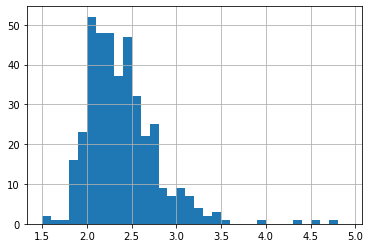

In [10]:
haroharo.magnitude.hist(bins=np.arange(1.5,5,0.1).tolist())

#### All events

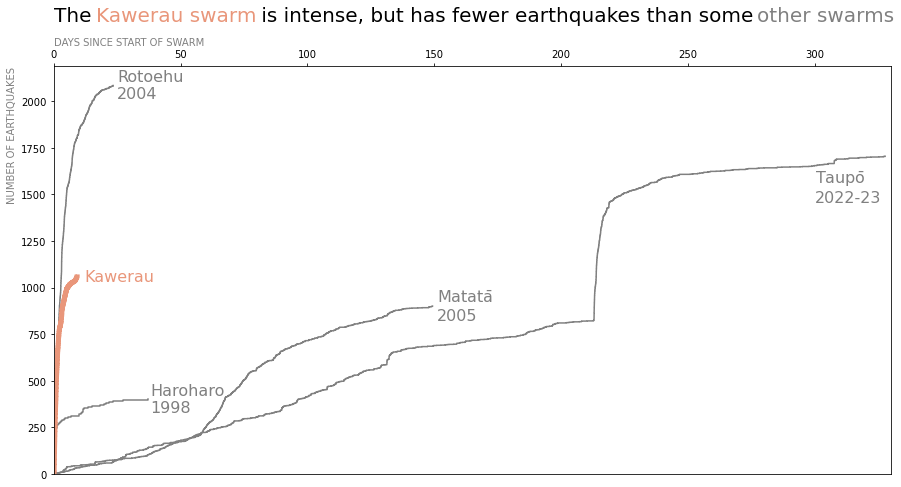

In [11]:
fig,ax = plt.subplots(1,1,figsize=(15,7.5))

#rotoehu
ax.step(rotoehu['days'], rotoehu['evnum'], where='post', color='gray')
ax.text(25, 2086, 'Rotoehu\n2004', color='gray', va='center', fontsize=16)

#taupo
ax.step(taupo['days'], taupo['evnum'], where='post', color='gray')
ax.text(300, 1540, r'Taup$\mathrm{\bar{o}}$'+'\n2022-23', color='gray', va='center', fontsize=16)

#matataa
ax.step(matataa['days'], matataa['evnum'], where='post', color='gray')
ax.text(151, 901, r'Matat$\mathrm{\bar{a}}$'+'\n2005', color='gray', va='center', fontsize=16)

#haroharo
ax.step(haroharo['days'], haroharo['evnum'], where='post', color='gray')
ax.text(38, 400, 'Haroharo\n1998', color='gray', va='center', fontsize=16)

#kawerau
ax.step(kawerau['days'], kawerau['evnum'], where='post', color='darksalmon', linewidth=5)
ax.text(12, 1058, 'Kawerau', color='darksalmon', va='center', fontsize=16)

ax.set_xlabel('DAYS SINCE START OF SWARM', color='gray', loc='left')
ax.set_ylabel('NUMBER OF EARTHQUAKES', color='gray', loc='top')

ax.set_xlim(left=0, right=330)
ax.set_ylim(bottom=0)

ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')

ax.text(0, 1.1, 'The ', ha='left', va='bottom',
        transform=ax.transAxes, fontsize=20, color='black')
ax.text(0.05, 1.1, 'Kawerau swarm', ha='left', va='bottom',
        transform=ax.transAxes, fontsize=20, color='darksalmon')
ax.text(0.24, 1.1, ' is intense, but has fewer earthquakes than some ', ha='left', va='bottom',
        transform=ax.transAxes, fontsize=20, color='black')
ax.text(0.84, 1.1, 'other swarms', ha='left', va='bottom',
        transform=ax.transAxes, fontsize=20, color='gray')

# ax.text(0.98, 0.05, 'Kawerau and '+r'Taup$\mathrm{\bar{o}}$'+' data\nup to 2023-03-27', transform=ax.transAxes,
#         fontsize=12, color='gray', ha='right')

plt.savefig('swarm_1.png', dpi=200, bbox_inches='tight', facecolor='white')

#### M>3 events

Rotoehu

In [12]:
rotoehum3 = rotoehu.copy()
rotoehum3 = rotoehum3[rotoehum3['magnitude']>3]

rotoehum3['evnum'] = np.arange(len(rotoehum3))

Taupo

In [13]:
taupom3 = taupo.copy()
taupom3 = taupom3[taupom3['magnitude']>3]

taupom3['evnum'] = np.arange(len(taupom3))

In [14]:
len(taupom3)

47

Matataa

In [15]:
matataam3 = matataa.copy()
matataam3 = matataam3[matataam3['magnitude']>3]

matataam3['evnum'] = np.arange(len(matataam3))

Haroharo

In [16]:
haroharom3 = haroharo.copy()
haroharom3 = haroharom3[haroharom3['magnitude']>3]

haroharom3['evnum'] = np.arange(len(haroharom3))

Kawerau

In [17]:
kaweraum3 = kawerau.copy()
kaweraum3 = kaweraum3[kaweraum3['magnitude']>3]

kaweraum3['evnum'] = np.arange(len(kaweraum3))

In [18]:
len(kaweraum3)

57

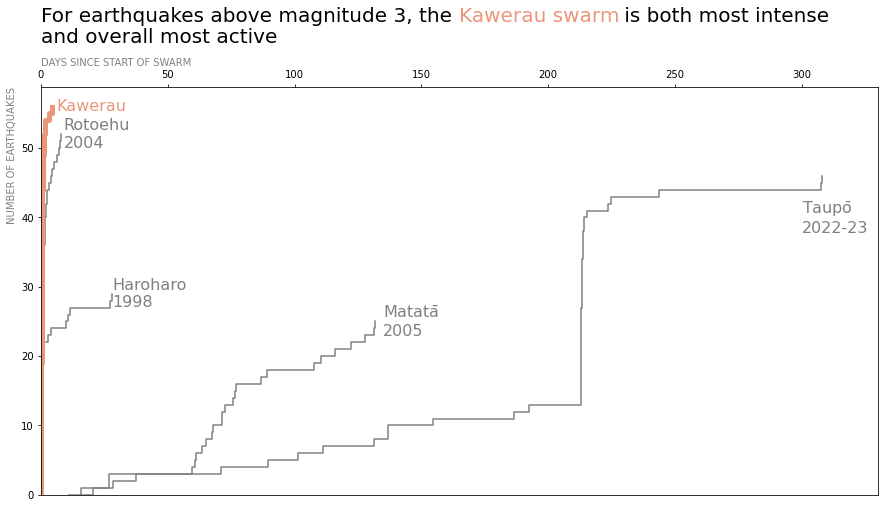

In [19]:
fig,ax = plt.subplots(1,1,figsize=(15,7.5))

#rotoehu
ax.step(rotoehum3['days'], rotoehum3['evnum'], where='post', color='gray')
ax.text(9, 52, 'Rotoehu\n2004', color='gray', va='center', fontsize=16)

#taupo
ax.step(taupom3['days'], taupom3['evnum'], where='post', color='gray')
ax.text(300, 40, r'Taup$\mathrm{\bar{o}}$'+'\n2022-23', color='gray', va='center', fontsize=16)

#matataa
ax.step(matataam3['days'], matataam3['evnum'], where='post', color='gray')
ax.text(135, 25, r'Matat$\mathrm{\bar{a}}$'+'\n2005', color='gray', va='center', fontsize=16)

#haroharo
ax.step(haroharom3['days'], haroharom3['evnum'], where='post', color='gray')
ax.text(28, 29, 'Haroharo\n1998', color='gray', va='center', fontsize=16)

#kawerau
ax.step(kaweraum3['days'], kaweraum3['evnum'], where='post', color='darksalmon', linewidth=5)
ax.text(6, 56, 'Kawerau', color='darksalmon', va='center', fontsize=16)

ax.set_xlabel('DAYS SINCE START OF SWARM', color='gray', loc='left')
ax.set_ylabel('NUMBER OF EARTHQUAKES', color='gray', loc='top')
ax.set_xlim(left=0, right=330)
ax.set_ylim(bottom=0)

ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')

ax.text(0, 1.15, 'For earthquakes above magnitude 3, the ', ha='left', va='bottom',
        transform=ax.transAxes, fontsize=20, color='black')
ax.text(0.50, 1.15, 'Kawerau swarm', ha='left', va='bottom',
        transform=ax.transAxes, fontsize=20, color='darksalmon')
ax.text(0.69, 1.15, ' is both most intense', ha='left', va='bottom',
        transform=ax.transAxes, fontsize=20, color='black')
ax.text(0, 1.1, 'and overall most active', ha='left', va='bottom',
        transform=ax.transAxes, fontsize=20, color='black')

# ax.text(0.98, 0.05, 'Kawerau and '+r'Taup$\mathrm{\bar{o}}$'+' data\nup to 2023-03-27', transform=ax.transAxes,
#         fontsize=12, color='gray', ha='right')

plt.savefig('swarm_2.png', dpi=200, bbox_inches='tight', facecolor='white')